## DBSCAN Practice

We're familiar with DBSCAN. Now, let's practice it!

Let's work with the [NHL data](https://raw.githubusercontent.com/josephofiowa/GA-DSI/master/NHL_Data_GA.csv). We're going to investigate clustering teams based on their counting stats.

In [1]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt

## Load our data

Feel free to also do basic EDA. At least check the head()!

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/josephofiowa/GA-DSI/master/NHL_Data_GA.csv')
df.head()

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,Vancouver11,117,1,2056:14:00,94,72,2.74,2.10,56.6,1143,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,San Jose10,113,1,1929:54:00,90,68,2.80,2.11,57.0,1065,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
3,Chicago10,112,1,2020:23:00,104,83,3.09,2.46,55.6,1186,...,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
4,Vancouver12,111,1,2052:02:00,86,74,2.51,2.16,53.8,1078,...,51.0,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049


## Set up our X

Let's cluster on all features EXCEPT team, rank, and points.

(Bonus idea: make rank be our y category if we want to engage in additional clustering evaluation.)

In [4]:
X = df.drop(['Team', 'Rank', 'PTS'], axis=1)

array([['2001:52:00', 115, 73, ..., 93.03, 1034, 1269],
       ['2056:14:00', 94, 72, ..., 93.16, 1014, 985],
       ['1929:54:00', 90, 68, ..., 93.46, 1019, 1195],
       ..., 
       ['2129:37:00', 83, 89, ..., 92.27, 994, 902],
       ['1983:44:00', 72, 107, ..., 90.51, 978, 723],
       ['1894:49:00', 57, 93, ..., 91.18, 981, 754]], dtype=object)

In [5]:
# converting TOI into strictly the hour amount 
# splitting the column by :, taking the first item
X.TOI = X.TOI.apply(lambda x: x.split(':')[0])
X.TOI

0     2001
1     2056
2     1929
3     2020
4     2052
5     2280
6     2256
7     1942
8     2082
9     2168
10    1935
11    2036
12    2134
13    1984
14    2061
15    2095
16    1752
17    2048
18    1899
19    1908
20    2064
21    2138
22    2002
23    2245
24    2146
25    2003
26    2013
27    2011
28    2293
29    2046
      ... 
60    2172
61    1895
62    1974
63    1967
64    1967
65    2102
66    1874
67    2219
68    2001
69    2055
70    2084
71    1827
72    1883
73    2104
74    2101
75    2005
76    1965
77    1914
78    2202
79    1996
80    2073
81    1950
82    2059
83    2069
84    1991
85    2155
86    2034
87    2129
88    1983
89    1894
Name: TOI, Length: 90, dtype: object

In [6]:
# now making TOI a numeric value 
X.TOI = X.TOI.apply(lambda x: int(x))

In [2]:
# setting up our data to cluster
X = data 


# WE MUST SCALE AND STARDARDIZE THE DATA
X = StandardScaler().fit_transform(X)


## Scatter plot EDA

Check two scatter plots. Make at least one of them be points vs GF. Do we obtain a general idea of how many clusters we should witness?

In [7]:
X.columns

Index([u'TOI', u'GF', u'GA', u'GF60', u'GA60', u'GF%', u'SF', u'SA', u'SF60',
       u'SA60', u'SF%', u'FF', u'FA', u'FF60', u'FA60', u'FF%', u'CF', u'CA',
       u'CF60', u'CA60', u'CF%', u'Sh%', u'Sv%', u'PDO', u'PIM'],
      dtype='object')

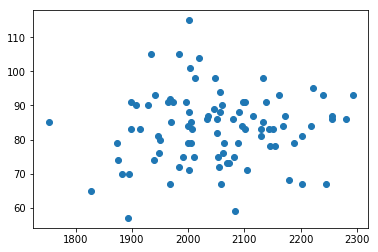

In [10]:
# plotting TOI vs GF
%matplotlib inline
plt.scatter(X['TOI'], X['GF'])


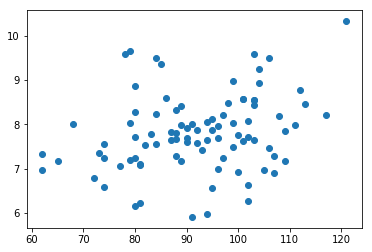

In [11]:
# plotting points vs shooting %
plt.scatter(df['PTS'], df['Sh%'])

## Scale our data

Who does a DBSCAN on unscaled data?! Savages. That's who.

In [12]:
X = StandardScaler().fit_transform(X)

## Instatiate our DBSCAN cluster

Remember to pass an epsilon and min_points of your choice.

In [21]:
# setting up DBSCAN
dbscan = DBSCAN(eps = 3, min_samples = 4)

# fitting model
model = dbscan.fit(X)

## Store our labels

Using the `.labels_` command on our DBSCAN class

In [22]:
labels = model.labels_

## Evaluate our cluster!

Let's check the silhouette score. As a bonus, if you set our y as rank, check out the homogenity, completeness, and v-measure. For the adventurous, see how you can adjust our epsilon and min_points to improve these.

In [23]:
import numpy as np
from sklearn import metrics

In [24]:
# identifying the core samples
core_samples = np.zeros_like(labels, dtype = bool)  

core_samples[dbscan.core_sample_indices_] = True 
print(core_samples)

[False False False False  True False False False False  True False False
 False False False False False False False False False  True False False
 False False False  True False False False False False False False False
  True False False False False False  True False False  True False False
 False  True  True False False False  True  True False  True False  True
 False False False False False  True False False False False False False
  True False  True False False False False False False False False  True
 False  True  True  True False False]


In [25]:
# declare the number of clusters:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [26]:
y = df['PTS']

In [27]:
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))





print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))


# homogeneity: each cluster contains only members of a single class.
# completeness: all members of a given class are assigned to the same cluster.
# The V-measure is the harmonic mean between homogeneity and completeness:
# Silhouette Coefficient - The best value is 1 and the worst value is -1. 
    # Values near 0 indicate overlapping clusters. 
    # Negative values generally indicate that a sample has been assigned to the wrong cluster, 
    # as a different cluster is more similar.

Estimated number of clusters: 3
Homogeneity: 0.163
Completeness: 0.595
V-measure: 0.256
Silhouette Coefficient: -0.065


## Optional: plot our clusters

Let's do this just like we did with the iris dataset.